# Part 1 (ARIMA)

In [1]:
#Packages
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

#Style
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('data/freesubway.csv', encoding='utf-8')
df

,date,year,line,name,take_on,free_take_on,take_off,free_take_off
0,2019-11-01,2019.0,1,1,1163679,171637,1125351,162796
1,2019-11-01,2019.0,1,2,553620,278314,568556,266901
2,2019-11-01,2019.0,1,3,642078,379915,605270,353918
3,2019-11-01,2019.0,1,4,181957,152029,197668,154876
4,2019-11-01,2019.0,1,5,285598,328094,276321,350312
5,2019-11-01,2019.0,1,6,368623,125450,360324,119589
6,2019-11-01,2019.0,1,7,1556332,229539,1473411,223666
7,2019-11-01,2019.0,1,8,309970,137022,347952,141381
8,2019-11-01,2019.0,1,9,446561,314880,464202,322778
9,2019-11-01,2019.0,1,10,708547,123715,727205,125736


In [4]:
df.shape

(18927, 8)

In [5]:
df.isnull().sum()

date                 0
year             11999
line                 0
name                 0
take_on              0
free_take_on         0
take_off             0
free_take_off        0
dtype: int64

In [6]:
df = df[['date', 'free_take_on']]
df.isnull().sum()
df.head()

,date,free_take_on
0,2019-11-01,171637
1,2019-11-01,278314
2,2019-11-01,379915
3,2019-11-01,152029
4,2019-11-01,328094


In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,date,free_take_on
0,2019-11-01,171637
1,2019-11-01,278314
2,2019-11-01,379915
3,2019-11-01,152029
4,2019-11-01,328094
5,2019-11-01,125450
6,2019-11-01,229539
7,2019-11-01,137022
8,2019-11-01,314880
9,2019-11-01,123715


In [8]:
df = df.groupby('date')['free_take_on'].sum().reset_index()
df

,date,free_take_on
0,2016-01-01,20798126
1,2016-02-01,19596850
2,2016-03-01,23607337
3,2016-04-01,22899488
4,2016-05-01,23154943
5,2016-06-01,22574494
6,2016-07-01,21849529
7,2016-08-01,22034197
8,2016-09-01,41868750
9,2016-10-01,46324692


In [9]:
df = df.set_index('date')
df.head()

,free_take_on
date,
2016-01-01,20798126
2016-02-01,19596850
2016-03-01,23607337
2016-04-01,22899488
2016-05-01,23154943


In [10]:
y = df['free_take_on'].resample('MS').mean()
y

date
2016-01-01     20798126
2016-02-01     19596850
2016-03-01     23607337
2016-04-01     22899488
2016-05-01     23154943
2016-06-01     22574494
2016-07-01     21849529
2016-08-01     22034197
2016-09-01     41868750
2016-10-01     46324692
2016-11-01     22532639
2016-12-01     22992436
2017-01-01     20417939
2017-02-01     20924997
2017-03-01     23918238
2017-04-01     23219909
2017-05-01     23415695
2017-06-01     23227468
2017-07-01     22055072
2017-08-01     22992714
2017-09-01     23459422
2017-10-01     22110085
2017-11-01     23376614
2017-12-01     23000896
2018-01-01     21726296
2018-02-01     19188318
2018-03-01     49101410
2018-04-01     23920999
2018-05-01     24894655
2018-06-01     23167239
2018-07-01     23354799
2018-08-01     22679573
2018-09-01     22550314
2018-10-01     24856425
2018-11-01     24100523
2018-12-01     24083269
2019-01-01     23528321
2019-02-01     20423525
2019-03-01     25266858
2019-04-01     24909857
2019-05-01     25719954
2019-06-01 

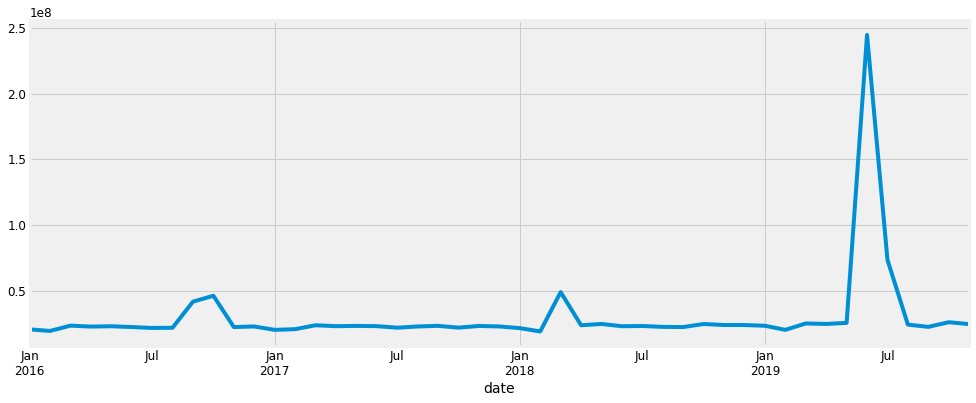

In [11]:
#Graph for past data
y.plot(figsize=(15,6))
plt.show()

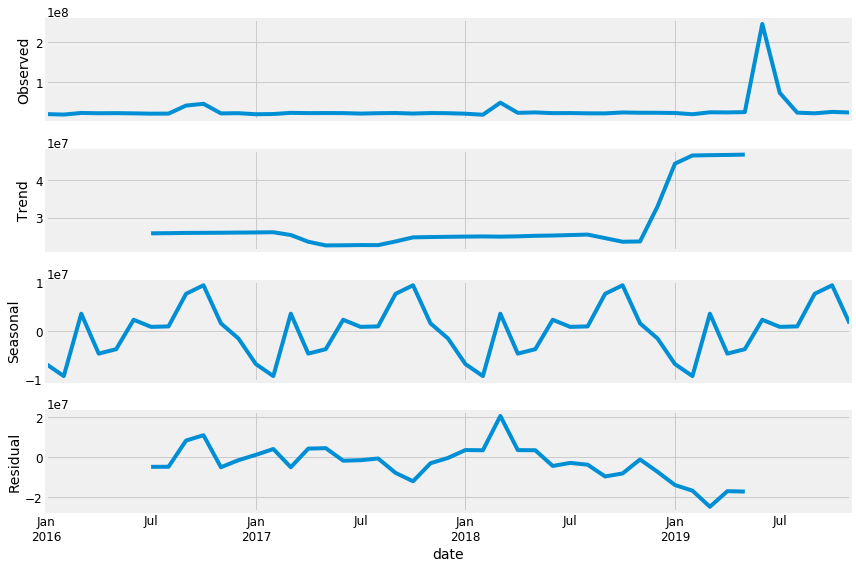

In [12]:
rcParams['figure.figsize'] = 12,8

decomposition = sm.tsa.seasonal_decompose(y, model="additive")
fig = decomposition.plot()
plt.show()

In [13]:
#Parameter combinations for Seasonal ARIMA
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
# 최적의 통계 기준 찾기(AIC 작을수록 좋음)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1753.9179703243071
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8826625846.425135
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1290.3168967042216
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1326.6156108687303
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8409743531.271074
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:882.654720657112
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1707.7424152548601


C:\Users\chohyoungseo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8442593394.338486
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1251.9515358075707
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1328.3461105412885
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8369947878.603159
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:884.4243659291463
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1711.0461043494558
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1003715740.7265539
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1268.5444878628596
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1304.3565928851876


C:\Users\chohyoungseo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:997088973.9468681
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:855.0685346632198
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1657.3723676384293


C:\Users\chohyoungseo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:987631404.3340352
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1217.197798742537
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1284.77936194263
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:981003588.3481717
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:845.7118682094971
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1738.5903651654116
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:975696172.9209733
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1288.66263930562
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1290.5389779278698


C:\Users\chohyoungseo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:974059326.2692719
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:848.4601453218336
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1686.7640991220326
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:975695764.9942911
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1253.9012169058467


C:\Users\chohyoungseo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1292.4729005023125


C:\Users\chohyoungseo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:974036379.5460694
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:849.5316818237362
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1706.7225077148207


C:\Users\chohyoungseo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1002572221.5609239
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1263.4231013636875
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1265.9630205530211
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:996023038.5037634
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:818.623643003361
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1649.5468616222236


C:\Users\chohyoungseo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:986816563.9612263
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1218.2438931202037
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1246.1527278793765
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:980228993.130928
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:810.0226620823706


In [16]:
mod = sm.tsa.statespace.SARIMAX(y,
                               order = (1, 1, 1),
                               seasonal_order=(1,1,0,12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results = mod.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       free_take_on   No. Observations:                   47
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -401.011
Date:                            Sat, 11 Jan 2020   AIC                            810.023
Time:                                    16:40:05   BIC                            814.201
Sample:                                01-01-2016   HQIC                           810.929
                                     - 11-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1373      1.480      0.093      0.926      -2.762       3.037
ma.L1         -1.0131      0.037    -27.754      0.000      -1.085      -0.942
ar.S.L12      -0.0640      1.913     -0.033      0.973      -3.814       3.686
sigma2       2.13e+15        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):               245.52
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):              24.53   Skew:                             4.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.21e+45. Standard errors may be unstable.
"""

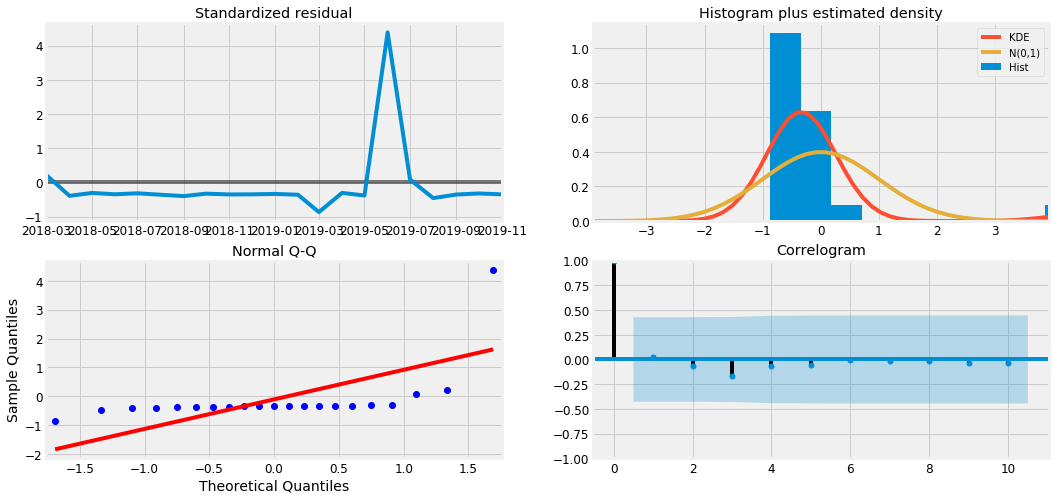

In [17]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

<function matplotlib.pyplot.legend(*args, **kwargs)>

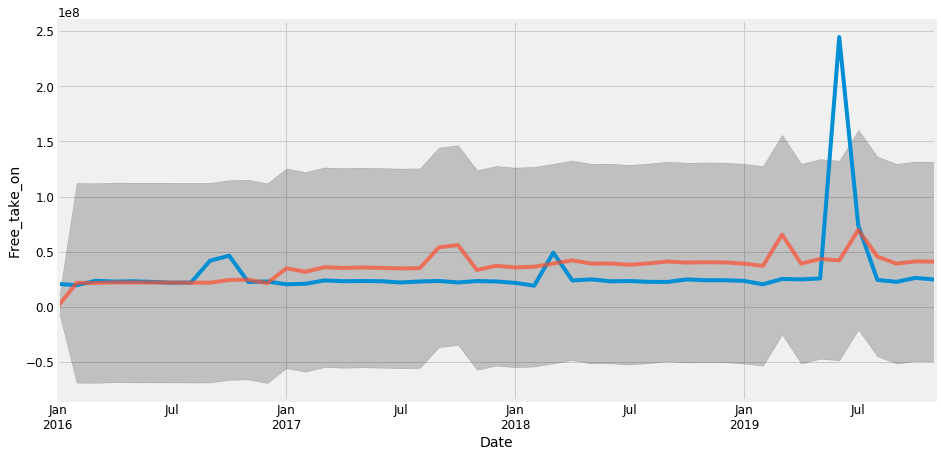

In [18]:
# Predict with past data
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'),
                             dynamic=False)
pred_ci = pred.conf_int()

ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha =.7, figsize=(14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Free_take_on')
plt.legend

In [19]:
# Scoring with MSE(Mean Squared Error)
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]

mse = ((y_forecasted - y_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1123035299373426.9


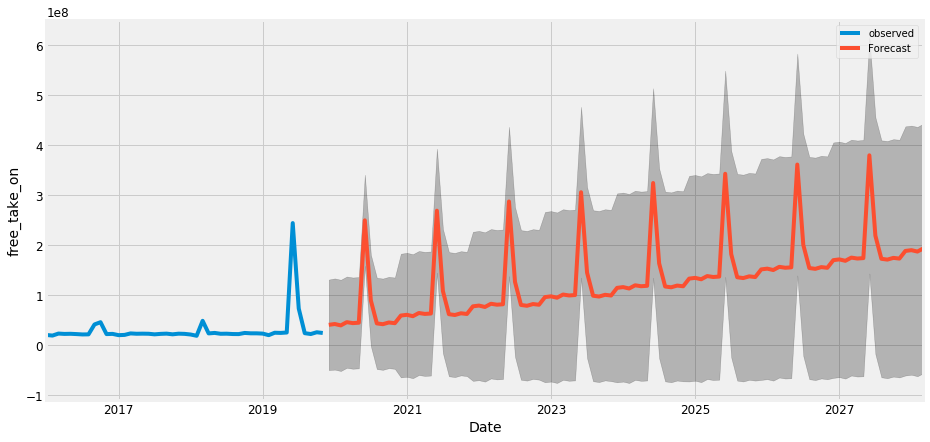

In [20]:
#Predict
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('free_take_on')
plt.legend()
plt.show()

# Part 2

In [21]:
#호선별 무임승차
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('data/subwayfeeyear.csv',encoding='cp949') 
df_test = pd.read_csv('data/subwayfeeyear.csv',encoding='cp949') 
df.head()
test = df_test[['year/month','line','free_take_on']]
test.head()
data = df.pivot_table(index='year/month',columns='line',values='free_take_on')


In [22]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'data/batang.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

df.head()

,year/month,raw_line,line,name,take_on,free_take_on,take_off,free_take_off
0,2016,2호선,2,30,698756.0,116150,661125,119899
1,2016,2호선,2,26,1738572.0,152707,1746347,155660
2,2016,2호선,2,42,822355.0,110322,854572,114295
3,2016,2호선,2,53,1701314.0,190617,1682435,182936
4,2016,2호선,2,41,480939.0,74215,489038,73480


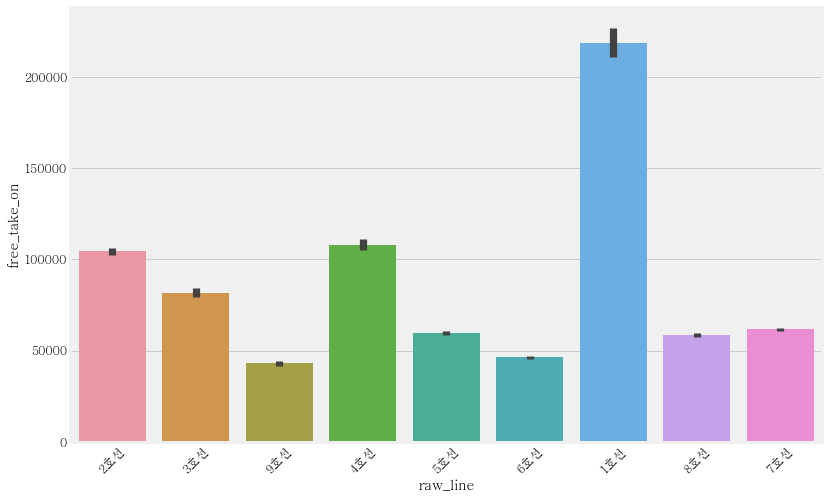

In [23]:
plt.xticks(rotation = 45)
sns.barplot(x="raw_line", y="free_take_on", data=df)

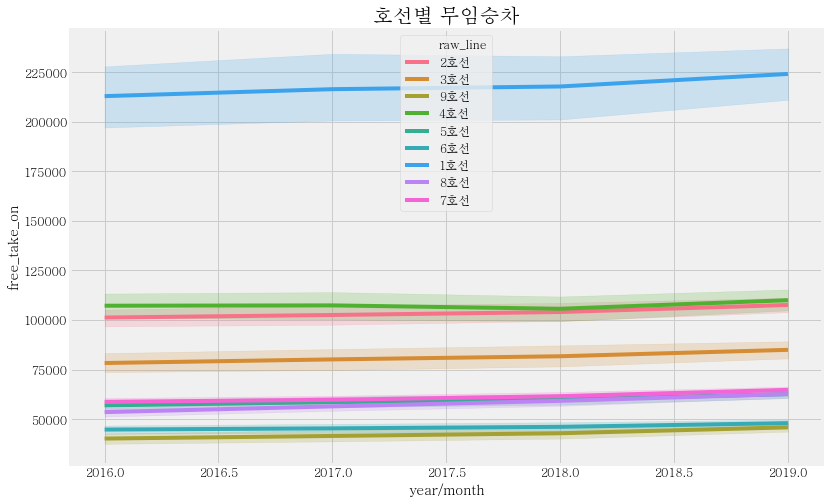

In [24]:
ax = sns.lineplot(x='year/month', y='free_take_on', hue='raw_line', data=df)
plt.title('호선별 무임승차', fontsize=20)
plt.ylabel('free_take_on', fontsize=14)
plt.xlabel('year/month', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

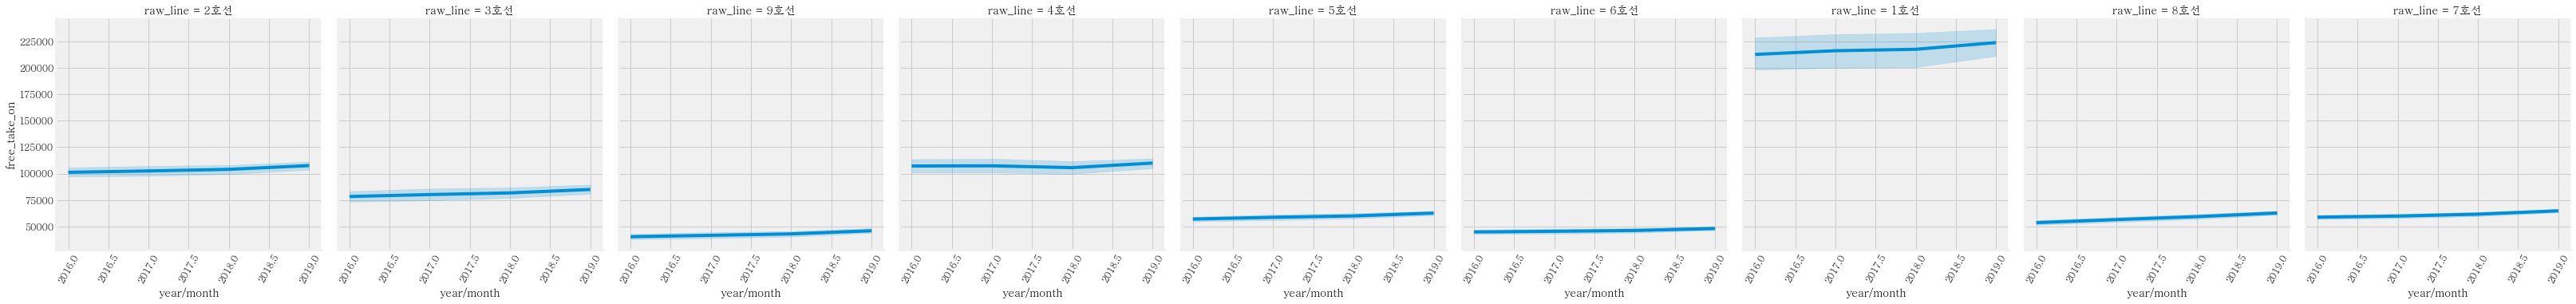

In [25]:
g = sns.relplot(x="year/month", y="free_take_on", col="raw_line", kind="line", data=df)
(g.set_xticklabels(rotation=60))

# Part3

In [26]:
import csv
 
f = open('data/subwayfee.csv')
data = csv.reader(f)
next(data)
 
mx = 0 
rate = 0 
mx_station = ''
 
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[5] != 0 :
        rate = row[5] / (row[4]+row[5])
        if rate > mx :
            mx = rate
            mx_station = row[0]+' '+row[3]+' '+row[2]
            if round(mx*100,2) > 50.00 :
                print(mx_station, round(mx*100,2))

201601 5 1 52.34
201609 5 1 53.93
201709 5 1 54.64
201802 5 1 54.97
201809 5 1 56.92


## 결과: 무임승차 비율이 50% 넘는 곳은 제기동과 서울역

## 무임하차 비율이 가장 높은 역

In [27]:
#데이터 불러오기
import csv
f = open('data/subwayfee.csv')
data = csv.reader(f)
next(data)
 
#변수 초기화
mx = 0 #rate의 최댓값을 저장
rate = 0 #유임승차인원/전체(유임+무임)인원
mx_station = ''

for row in data : #모든 역에 대해 반복 
    
    for i in range(4,8) : #유무임하차 인원의 데이터를 정수로 변환 
        row[i] = int(row[i]) 

    if row[7] != 0 :
        rate = row[7] / (row[6]+row[7])
        if rate > mx :
            mx = rate
            mx_station = row[0]+' '+row[3]+' '+row[2]
            if round(mx*100,2) > 50.00 :
                print(mx_station, round(mx*100,2))

201601 5 1 54.1
201609 5 1 55.97
201709 5 1 56.99
201809 5 1 59.14


## 결과: 무임 하자 비율이 50% 넘는 곳은 모두 제기동

## 3. Prophet 적용

### 3-1. 2019년 12월 - 2022년 10월 1호선 무임승차 인원예상

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
from datetime import datetime

In [31]:
df = pd.read_csv('data/line1_2.csv')
df.head()

,ds,y
0,2019-11-01,171637
1,2019-11-01,278314
2,2019-11-01,379915
3,2019-11-01,152029
4,2019-11-01,328094


In [32]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future = m.make_future_dataframe(periods=1095)
future.tail()

,ds
1820,2022-10-27
1821,2022-10-28
1822,2022-10-29
1823,2022-10-30
1824,2022-10-31


In [34]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
1820,2022-10-27,224704.612314,-15382.969293,625756.471764,66197.682386,392939.803749,0.312562,0.312562,0.312562,0.312562,0.312562,0.312562,0.0,0.0,0.0,294938.677889
1821,2022-10-28,224713.416237,-6112.506514,590815.277875,65921.544676,393183.948184,0.318452,0.318452,0.318452,0.318452,0.318452,0.318452,0.0,0.0,0.0,296273.755025
1822,2022-10-29,224722.220160,-20108.115180,604254.913166,65621.040760,393519.320830,0.317609,0.317609,0.317609,0.317609,0.317609,0.317609,0.0,0.0,0.0,296095.964492
1823,2022-10-30,224731.024083,12589.304651,620149.037759,65323.951096,393854.693476,0.309784,0.309784,0.309784,0.309784,0.309784,0.309784,0.0,0.0,0.0,294349.039795
1824,2022-10-31,224739.828006,-18140.194510,601408.957904,65031.628816,394190.066122,0.294906,0.294906,0.294906,0.294906,0.294906,0.294906,0.0,0.0,0.0,291016.858763


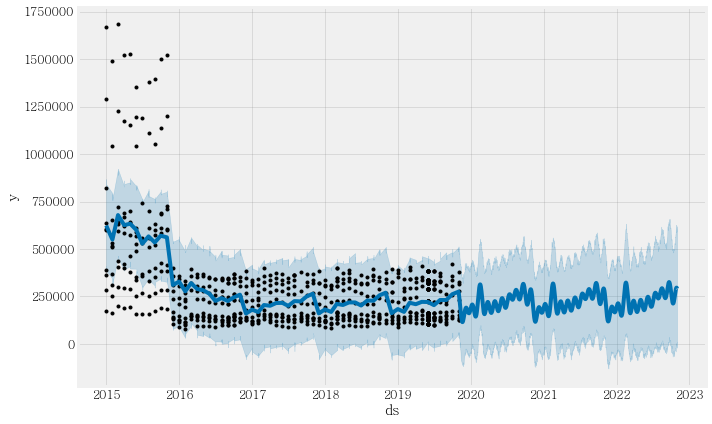

In [35]:
fig = m.plot(forecast)

### 3-2. 너무 튀는 값은 예측에 영향을 주기 때문에 2015년도 데이터를 제거 > line1_4.csv 사용

너무 간격이 큰 데이터 값으로 인해 후대의 예측 값까지 지속적으로 영향을 미쳐 Uncertainty Intervals이 발생할 수 있기 때문에 데이터를 제거할 필요가 있다. 

In [36]:
df = pd.read_csv('data/line1_4.csv')
df.head()

,ds,y
0,2019-11-01,171637
1,2019-11-01,278314
2,2019-11-01,379915
3,2019-11-01,152029
4,2019-11-01,328094


In [37]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df);

future = m.make_future_dataframe(periods=1095)
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1700,2022-10-27
1701,2022-10-28
1702,2022-10-29
1703,2022-10-30
1704,2022-10-31


In [38]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2016-01-01,212496.197568,74279.242866,317145.624167,212496.197568,212496.197568,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,0.0,0.0,0.0,195494.025204
1,2016-01-01,212496.197568,76150.939659,323830.194919,212496.197568,212496.197568,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,0.0,0.0,0.0,195494.025204
2,2016-01-01,212496.197568,77175.840176,323975.225499,212496.197568,212496.197568,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,0.0,0.0,0.0,195494.025204
3,2016-01-01,212496.197568,74706.781034,312198.504115,212496.197568,212496.197568,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,0.0,0.0,0.0,195494.025204
4,2016-01-01,212496.197568,77773.266020,313916.854682,212496.197568,212496.197568,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,0.0,0.0,0.0,195494.025204
5,2016-01-01,212496.197568,71961.647381,314953.565353,212496.197568,212496.197568,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,0.0,0.0,0.0,195494.025204
6,2016-01-01,212496.197568,75476.087751,317922.838383,212496.197568,212496.197568,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,0.0,0.0,0.0,195494.025204
7,2016-01-01,212496.197568,73104.028149,318301.546624,212496.197568,212496.197568,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,0.0,0.0,0.0,195494.025204
8,2016-01-01,212496.197568,76100.591607,316521.367367,212496.197568,212496.197568,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,0.0,0.0,0.0,195494.025204
9,2016-01-01,212496.197568,74400.420889,315410.569598,212496.197568,212496.197568,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,-0.080012,0.0,0.0,0.0,195494.025204


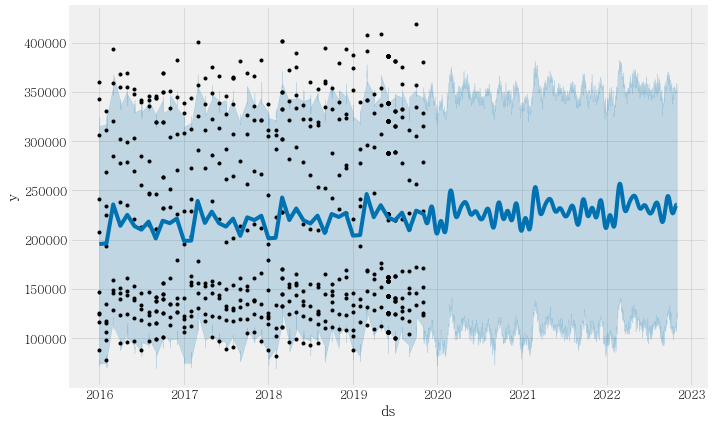

In [39]:
fig = m.plot(forecast)

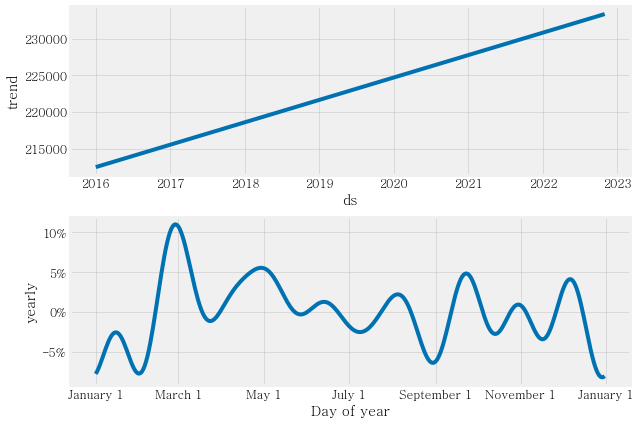

In [40]:
fig2 = m.plot_components(forecast)

### 3-2. 2019년 12월 - 2022년 10월 제기동역 무임승차 인원예상

In [41]:
df = pd.read_csv('data/name5.csv')
df.head()

,ds,y
0,2019-11-01,171637
1,2019-11-01,278314
2,2019-11-01,379915
3,2019-11-01,152029
4,2019-11-01,328094


In [42]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df);

future = m.make_future_dataframe(periods=1095)
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
20017,2022-10-27
20018,2022-10-28
20019,2022-10-29
20020,2022-10-30
20021,2022-10-31


In [43]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2016-01-01,73534.507213,1709.283244,143770.737506,73534.507213,73534.507213,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,69555.464692
1,2016-01-01,73534.507213,-633.932415,139437.885183,73534.507213,73534.507213,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,69555.464692
2,2016-01-01,73534.507213,-2830.265672,145037.304242,73534.507213,73534.507213,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,69555.464692
3,2016-01-01,73534.507213,4365.326222,144798.087981,73534.507213,73534.507213,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,69555.464692
4,2016-01-01,73534.507213,-488.735908,138196.566402,73534.507213,73534.507213,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,69555.464692
5,2016-01-01,73534.507213,-1915.751701,136929.536703,73534.507213,73534.507213,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,69555.464692
6,2016-01-01,73534.507213,912.330726,138856.359807,73534.507213,73534.507213,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,69555.464692
7,2016-01-01,73534.507213,559.772913,137289.620439,73534.507213,73534.507213,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,69555.464692
8,2016-01-01,73534.507213,-881.967686,140065.931689,73534.507213,73534.507213,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,69555.464692
9,2016-01-01,73534.507213,-2567.356344,142916.572218,73534.507213,73534.507213,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,69555.464692


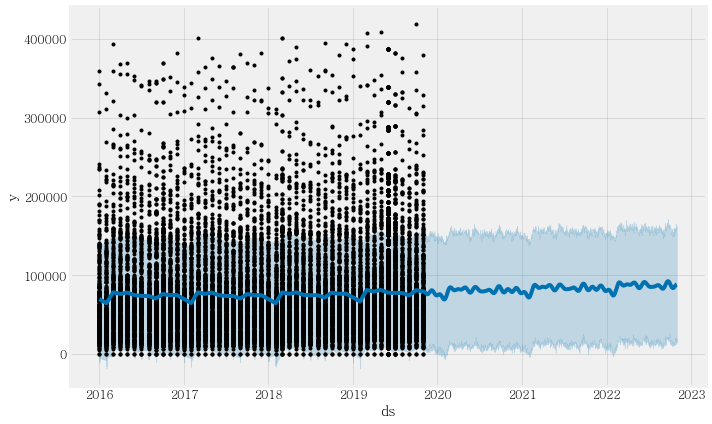

In [44]:
fig = m.plot(forecast)

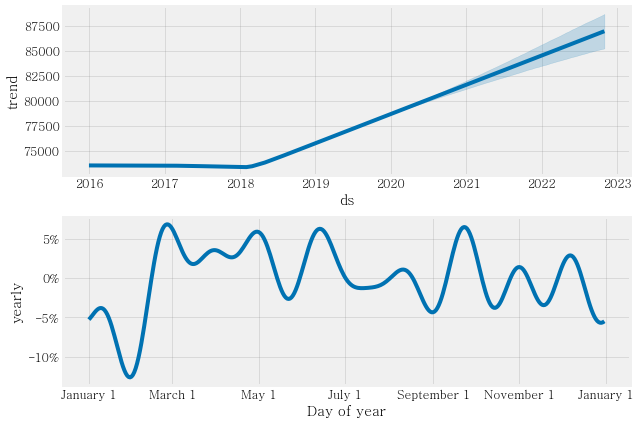

In [45]:
fig2 = m.plot_components(forecast)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns

In [48]:
df = pd.read_csv('data/subwayfeeexclude2015.csv', encoding='cp949')
df.head()

,date,year,line,name,take_on,free_take_on,take_off,free_take_off
0,2019-11-01,2019.0,1,1,1163679,171637,1125351,162796
1,2019-11-01,2019.0,1,2,553620,278314,568556,266901
2,2019-11-01,2019.0,1,3,642078,379915,605270,353918
3,2019-11-01,2019.0,1,4,181957,152029,197668,154876
4,2019-11-01,2019.0,1,5,285598,328094,276321,350312


In [49]:
zegi = pd.read_csv('data/zegi.csv')
zegi.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,201911,1호선,제기동,285598,328094,276321,350312,20191203
1,201910,1호선,제기동,296151,357200,286159,382149,20191103
2,201909,1호선,제기동,264818,332466,256270,356572,20191003
3,201908,1호선,제기동,268193,332498,259146,353671,20190903
4,201907,1호선,제기동,282671,330434,272541,351063,20190803


In [50]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'data/batang.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

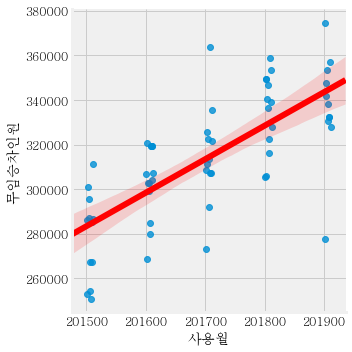

In [51]:
sns.lmplot(x="사용월", y="무임승차인원", data=zegi, line_kws={'color':"red"})

# 제기역 무임승차인원예측

In [55]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


df = pd.read_csv('data/zegi_train.csv')
df.loc[df['호선명']=='1호선', '호선명'] = 1
df.head()

x_data = df[['사용월']]
#_data = df.drop(['사용월'], axis=1)

y_data = df[['무임승차인원']]

#202501월 - 434044명 - 52%
lr = LinearRegression().fit(x_data, y_data)
predict_acc="약 "+str(int(round(lr.score(x_data,y_data)*100)))+"%"
print("예측값의 신뢰도:", predict_acc) #정확도 측정

predict_when_list=[]
predict_result_list=[]
for tmp in range(202001,203013,1):
    tmp=str(tmp)
    if int(tmp[4:6]) > 12 or tmp[4:6] == '00':
        continue
    else:
        tmp_list=lr.predict([[int(tmp)]])
        predict_result=str(int(round(tmp_list[0][0])))
        if tmp[4] == '1':
            print(tmp[0:4],"년 ",tmp[4:7],"월 제기역의 무임승차인원 예측값 : ",predict_result+"명")
            predict_when_list.append(tmp)
            predict_result_list.append(predict_result)
        else:
            print(tmp[0:4],"년 ",tmp[5:7],"월 제기역의 무임승차인원 예측값 : ",predict_result+"명")
            predict_when_list.append(tmp)
            predict_result_list.append(predict_result)


예측값의 신뢰도: 약 54%
2020 년  1 월 제기역의 무임승차인원 예측값 :  357663명
2020 년  2 월 제기역의 무임승차인원 예측값 :  357813명
2020 년  3 월 제기역의 무임승차인원 예측값 :  357964명
2020 년  4 월 제기역의 무임승차인원 예측값 :  358115명
2020 년  5 월 제기역의 무임승차인원 예측값 :  358266명
2020 년  6 월 제기역의 무임승차인원 예측값 :  358417명
2020 년  7 월 제기역의 무임승차인원 예측값 :  358567명
2020 년  8 월 제기역의 무임승차인원 예측값 :  358718명
2020 년  9 월 제기역의 무임승차인원 예측값 :  358869명
2020 년  10 월 제기역의 무임승차인원 예측값 :  359020명
2020 년  11 월 제기역의 무임승차인원 예측값 :  359170명
2020 년  12 월 제기역의 무임승차인원 예측값 :  359321명
2021 년  1 월 제기역의 무임승차인원 예측값 :  372741명
2021 년  2 월 제기역의 무임승차인원 예측값 :  372891명
2021 년  3 월 제기역의 무임승차인원 예측값 :  373042명
2021 년  4 월 제기역의 무임승차인원 예측값 :  373193명
2021 년  5 월 제기역의 무임승차인원 예측값 :  373344명
2021 년  6 월 제기역의 무임승차인원 예측값 :  373494명
2021 년  7 월 제기역의 무임승차인원 예측값 :  373645명
2021 년  8 월 제기역의 무임승차인원 예측값 :  373796명
2021 년  9 월 제기역의 무임승차인원 예측값 :  373947명
2021 년  10 월 제기역의 무임승차인원 예측값 :  374098명
2021 년  11 월 제기역의 무임승차인원 예측값 :  374248명
2021 년  12 월 제기역의 무임승차인원 예측값 :  374399명
2022 년  1 월 제기역의 무임승차인원 예측값 :  387818명
202